# Mammal Type Classifier

The purpose of this notebook is to create a mammal type classifier using a pretrained neural network, capable of identifying and categorizing various mammals into five primary groups: primates, rodents, ungulates, carnivores, and marsupials.

To achieve this, we first collect and preprocess approximately 100 images per animal from each mammal category by automating image retrieval from Google and Bing. Using requests and BeautifulSoup, we scrape image URLs from search results and download them for training. The script constructs search queries, extracts relevant image links, and saves them in structured datasets.

Next, we fine-tune the pretrained neural network to recognize these mammal groups. Finally, we evaluate the model’s performance by testing it on new images, assessing its accuracy and generalization capabilities.


### Steps:
#### 1. Get and Preprocess data
   Use Google and Bing to search for images of various mammal types, extracting image URLs with BeautifulSoup and downloading them for training. Approximately 100 images per animal are collected to ensure dataset diversity
   - Primates: Chimpanzees, gorillas, orangutans, baboons, and capuchin monkeys
   - Rodents: Beavers, squirrels, porcupines, rats, and mice
   - Ungulates: Deer, elk, moose, giraffes, and zebras
   - Carnivores: Lions, tigers, leopards, wolves, and bears
   - Marsupials: Kangaroos, wallabies, koalas, opossums, and wombats
   
#### 2. Train the Model
   Fine-tune a pretrained neural network to recognise these groups

#### 3. Test the Model 
   Test the model on images

## Step 1: Get and Preprocess data

In [97]:
# import libraries
from fastcore.all import *
from fastai.vision.all import *
from fastdownload import download_url
# from duckduckgo_search import ddg_imagesddg
from bing_image_downloader import downloader
from tkinter import Image
from time import sleep
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
from IPython.display import display, HTML

In [125]:
def search_google_image(query, max_images=1):
    url = f"https://www.google.com/search?q={query}&tbm=isch"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }
    
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    images = soup.find_all('img')
    
    if images:
        image_urls = []
        for img in images[1:max_images+1]:  # Start from index 1 to skip the first image
            src = img.get('src')  # Safely get 'src' attribute
            if src and not src.endswith('.gif'):  # Exclude .gif images
                image_urls.append(src)
        return image_urls if image_urls else None
    else:
        return None


def search_bing_image(query, max_images=1):
    url = f"https://www.bing.com/images/search?q={query}"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    images = soup.find_all('img', class_='mimg')

    if images:
        image_urls = []
        for img in images[:max_images]:
            src = img.get('src')  # Safely get 'src' attribute
            if src and not src.endswith('.gif'):  # Exclude .gif images
                image_urls.append(src)
        return image_urls if image_urls else None
    else:
        return None
    

def search_yandex_image(query, max_images=1):
    url = f"https://yandex.com/images/search?text={query}"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    images = soup.find_all('img', class_='serp-item__thumb')

    if images:
        image_urls = []
        for img in images[:max_images]:
            src = img.get('src')  # Safely get 'src' attribute
            if src and not src.endswith('.gif'):  # Exclude .gif images
                image_urls.append(src)
        return image_urls if image_urls else None
    else:
        return None


def search_yahoo_image(query, max_images=1):
    url = f"https://images.search.yahoo.com/search/images?p={query}"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    images = soup.find_all('img', class_='process')

    if images:
        image_urls = []
        for img in images[:max_images]:
            src = img.get('src')  # Safely get 'src' attribute
            if src and not src.endswith('.gif'):  # Exclude .gif images
                image_urls.append(src)
        return image_urls if image_urls else None
    else:
        return None
    

def search_unsplash_image(query, max_images=1):
    url = f"https://unsplash.com/s/photos/{query}"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    images = soup.find_all('img', class_='YVj9w')

    if images:
        image_urls = []
        for img in images[:max_images]:
            src = img.get('src')  # Safely get 'src' attribute
            if src and not src.endswith('.gif'):  # Exclude .gif images
                image_urls.append(src)
        return image_urls if image_urls else None
    else:
        return None

In [ ]:
def search_images(engine, image, category, max_images=1, test=False):
    """Search and download images from specified search engine."""
    query = f"{image} mammal photo"
    start_time = time.time()
    
    if engine == 'google':
        image_urls = search_google_image(query, max_images)
        engine_letter = 'g'
    elif engine == 'bing':
        image_urls = search_bing_image(query, max_images)
        engine_letter = 'b'
    elif engine == 'yandex':
        image_urls = search_yandex_image(query, max_images)
        engine_letter = 'y'
    elif engine == 'yahoo':
        image_urls = search_yahoo_image(query, max_images)
        engine_letter = 'h'
    elif engine == 'unsplash':
        image_urls = search_unsplash_image(query, max_images)
        engine_letter = 'u'
    else:
        return 0, 0  # Invalid search engine

    successful_downloads = 0
    if image_urls:
        folder = 'sample' if test else 'training'
        category_path = Path(f"images/{folder}/{category}")
        category_path.mkdir(parents=True, exist_ok=True)
        
        for idx, image_url in enumerate(image_urls):
            try:
                response = requests.get(image_url, timeout=10)
                img = Image.open(BytesIO(response.content))
                image_name = f"{image}_{engine_letter}{idx+1}.jpg"
                save_path = category_path / image_name
                img.save(save_path)
                successful_downloads += 1
                if test:
                    print(f"{image} photo - {elapsed_time:.2f} seconds")
                    display(img)
            except Exception as e:
                print(f"Failed to download {image_url}: {e}")
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    return successful_downloads, elapsed_time


lion photo - 2.37 seconds


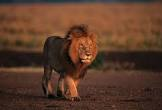

lion photo - 1.03 seconds


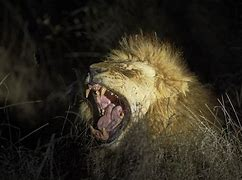

tiger photo - 0.94 seconds


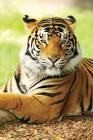

tiger photo - 0.87 seconds


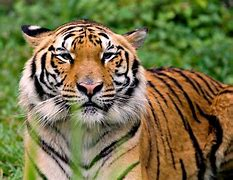

leopard photo - 0.96 seconds


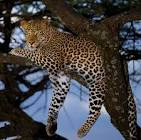

leopard photo - 0.93 seconds


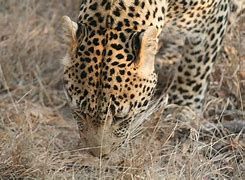

wolve photo - 0.81 seconds


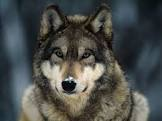

wolve photo - 0.87 seconds


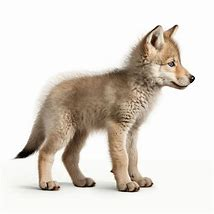

bear photo - 1.01 seconds


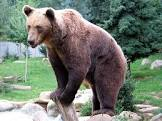

bear photo - 1.90 seconds


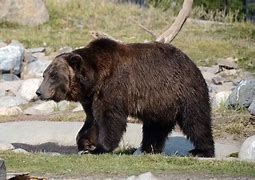

In [126]:
# view one image of animals in the carnivores category
carnivores = ['lion', 'tiger', 'leopard', 'wolve', 'bear']
for i in carnivores:
    search_images('google', i, 'carnivores', max_images=1, test=True)
    search_images('bing', i, 'carnivores', max_images=1, test=True)
    search_images('yandex', i, 'carnivores', max_images=1, test=True)
    search_images('yahoo', i, 'carnivores', max_images=1, test=True)
    search_images('unsplash', i, 'carnivores', max_images=1, test=True)

kangaroo photo - 0.78 seconds


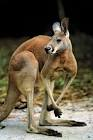

kangaroo photo - 0.73 seconds


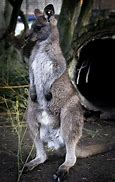

wallaby photo - 0.78 seconds


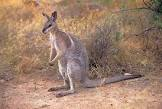

wallaby photo - 0.88 seconds


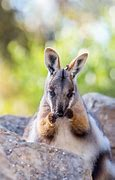

koala photo - 0.79 seconds


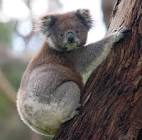

koala photo - 0.79 seconds


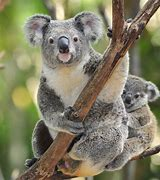

opossum photo - 0.79 seconds


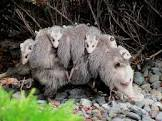

opossum photo - 0.96 seconds


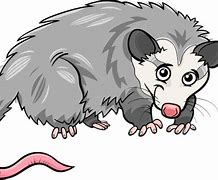

wombat photo - 0.82 seconds


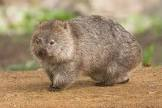

wombat photo - 0.84 seconds


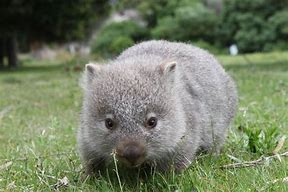

In [119]:
# view one image of animals in the marsupials category
marsupials = ['kangaroo', 'wallaby', 'koala', 'opossum', 'wombat']
for i in marsupials:
    search_images('google', i, 'marsupials', max_images=1, test=True)
    search_images('bing', i, 'marsupials', max_images=1, test=True)

chimpanzee photo - 0.83 seconds


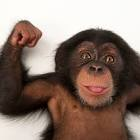

chimpanzee photo - 0.82 seconds


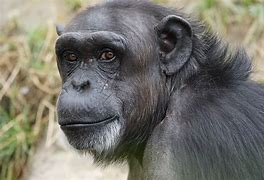

gorilla photo - 0.78 seconds


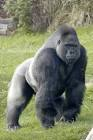

gorilla photo - 0.87 seconds


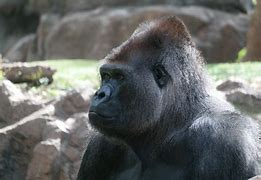

orangutan photo - 0.79 seconds


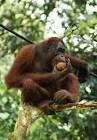

orangutan photo - 0.77 seconds


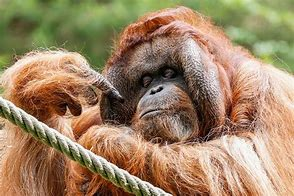

baboon photo - 0.82 seconds


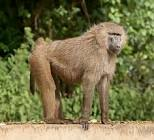

baboon photo - 2.03 seconds


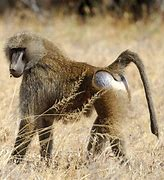

capuchin monkey photo - 1.00 seconds


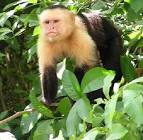

capuchin monkey photo - 0.89 seconds


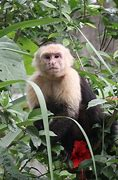

In [120]:
# view one image of animals in the primates category
primates = ['chimpanzee', 'gorilla', 'orangutan', 'baboon', 'capuchin monkey']
for i in primates:
    search_images('google', i, 'primates', max_images=1, test=True)
    search_images('bing', i, 'primates', max_images=1, test=True)

beaver photo - 0.87 seconds


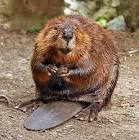

beaver photo - 0.85 seconds


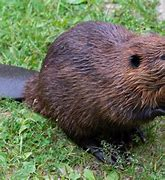

squirrel photo - 0.80 seconds


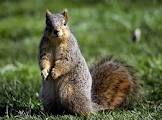

squirrel photo - 0.79 seconds


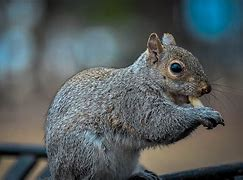

porcupine photo - 0.88 seconds


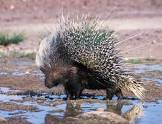

porcupine photo - 0.83 seconds


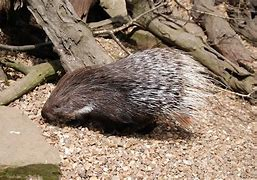

rat photo - 0.94 seconds


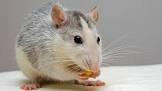

rat photo - 0.82 seconds


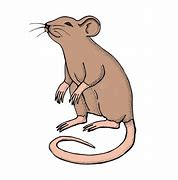

mouse photo - 0.81 seconds


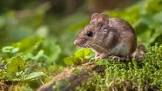

mouse photo - 0.94 seconds


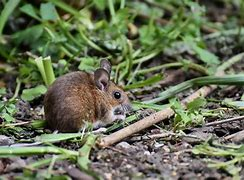

In [121]:
# view one image of animals in the rodents category
rodents =  ['beaver', 'squirrel', 'porcupine', 'rat', 'mouse']
for i in rodents:
    search_images('google', i, 'rodents', max_images=1, test=True)
    search_images('bing', i, 'rodents', max_images=1, test=True)

deer photo - 0.81 seconds


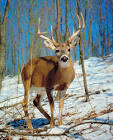

deer photo - 0.80 seconds


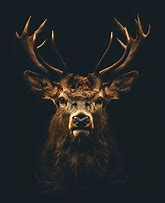

elk photo - 0.77 seconds


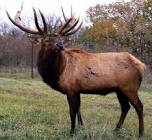

elk photo - 0.83 seconds


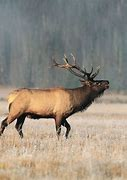

moose photo - 0.96 seconds


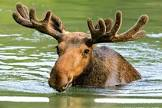

moose photo - 0.78 seconds


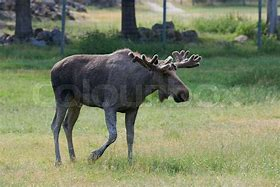

giraffe photo - 0.89 seconds


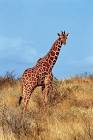

giraffe photo - 0.83 seconds


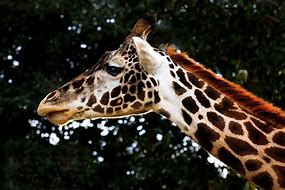

zebra photo - 1.17 seconds


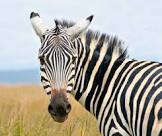

zebra photo - 1.45 seconds


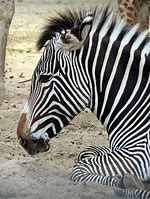

In [122]:
# view one image of animals in the ungulates category
ungulates =  ['deer', 'elk', 'moose', 'giraffe', 'zebra']
for i in ungulates:
    search_images('google', i, 'ungulates', max_images=1, test=True)
    search_images('bing', i, 'ungulates', max_images=1, test=True)

Lets start building our dataset

In [ ]:
# function to collect images for training
def collect_images_1(searches): 
    for category, animals in searches.items():
        for animal in animals:
            google_success, google_time = search_images('google', animal, category, max_images=50, test=False)  
            time.sleep(10)
            bing_success, bing_time = search_images('bing', animal, category, max_images=50, test=False)  
            time.sleep(10)
            
            total_success = google_success + bing_success
            total_time = google_time + bing_time
            print(f"Category: {category}, Animal: {animal}, Images Downloaded: {total_success}, Time Taken: {total_time:.2f} seconds")

In [ ]:
def collect_images(searches): 
    for category, animals in searches.items():
        for animal in animals:
            start_time = time.time()
            
            google_success, google_time = search_images('google', animal, category, max_images=50, test=False)  
            time.sleep(10)
            bing_success, bing_time = search_images('bing', animal, category, max_images=50, test=False)  
            time.sleep(10)
            
            end_time = time.time()
            total_time = end_time - start_time
            total_success = google_success + bing_success
            
            print(f"Category: {category}, Animal: {animal}, Images Downloaded: {total_success}, Time Taken: {total_time:.2f} seconds")

In [124]:
# collect mammal images
mammal_type_data = {
    'carnivore': ['lion', 'tiger', 'leopard', 'wolf', 'bear'],
    'marsupial': ['kangaroo', 'wallaby', 'koala', 'opossum', 'wombat'],
    'primate': ['chimpanzee', 'gorilla', 'orangutan', 'baboon', 'capuchin monkey'],
    'rodent': ['beaver', 'squirrel', 'porcupine', 'rat', 'mouse'],
    'ungulate': ['deer', 'elk', 'moose', 'giraffe', 'zebra']
}

collect_images(mammal_type_data)

Category: carnivore, Animal: lion, Images Downloaded: 31, Time Taken: 2.09 seconds
Category: carnivore, Animal: tiger, Images Downloaded: 31, Time Taken: 1.85 seconds
Category: carnivore, Animal: leopard, Images Downloaded: 32, Time Taken: 3.88 seconds
Category: carnivore, Animal: wolf, Images Downloaded: 31, Time Taken: 2.69 seconds
Category: carnivore, Animal: bear, Images Downloaded: 32, Time Taken: 2.08 seconds
Category: marsupial, Animal: kangaroo, Images Downloaded: 33, Time Taken: 1.78 seconds
Category: marsupial, Animal: wallaby, Images Downloaded: 33, Time Taken: 2.57 seconds
Category: marsupial, Animal: koala, Images Downloaded: 33, Time Taken: 1.62 seconds
Category: marsupial, Animal: opossum, Images Downloaded: 31, Time Taken: 1.80 seconds


KeyboardInterrupt: 

In [11]:
# build dataset 
searches =  'primate','rodent', 'ungulate', 'carnivore', 'marsupial'
path = Path('mammal_type')

for i in searches:
    dest = (path/i)
    dest.mkdir(exist_ok=True, parents=True)
    if i == 'primate':
        download_images(dest, urls=(search_images('chimpanzee photos')))
        sleep(10)
        download_images(dest, urls=(search_images('gorilla photos')))
        sleep(10)
        download_images(dest, urls=(search_images('orangutan photos')))
        sleep(10)
        download_images(dest, urls=(search_images('baboon photos')))
        sleep(10)
        download_images(dest, urls=(search_images('capuchin monkey photos')))
        sleep(10)
    elif i == 'rodent':
        download_images(dest, urls=(search_images('beaver photos')))
        sleep(10)
        download_images(dest, urls=(search_images('squirrel photos')))
        sleep(10)
        download_images(dest, urls=(search_images('porcupine photos')))
        sleep(10)
        download_images(dest, urls=(search_images('rat photos')))
        sleep(10)
        download_images(dest, urls=(search_images('mouse photos')))
        sleep(10)
    elif i == 'ungulate':
        download_images(dest, urls=(search_images('deer photos')))
        sleep(10)
        download_images(dest, urls=(search_images('elk photos')))
        sleep(10)
        download_images(dest, urls=(search_images('moose photos')))
        sleep(10)
        download_images(dest, urls=(search_images('giraffe photos')))
        sleep(10)
        download_images(dest, urls=(search_images('zebra photos')))
        sleep(10)
    elif i == 'carnivore':
        download_images(dest, urls=(search_images('lion photos')))
        sleep(10)
        download_images(dest, urls=(search_images('tiger photos')))
        sleep(10)
        download_images(dest, urls=(search_images('leopard photos')))
        sleep(10)
        download_images(dest, urls=(search_images('wolve photos')))
        sleep(10)
        download_images(dest, urls=(search_images('bear photos')))
        sleep(10)
    elif i == 'marsupial':
        download_images(dest, urls=(search_images('kangeroo photos')))
        sleep(10)
        download_images(dest, urls=(search_images('wallaby photos')))
        sleep(10)
        download_images(dest, urls=(search_images('koala photos')))
        sleep(10)
        download_images(dest, urls=(search_images('opossum photos')))
        sleep(10)
        download_images(dest, urls=(search_images('wombat photos')))
        sleep(10)
    resize_images(path/i, max_size=400, dest=path/i)

Searching for: chimpanzee photos
Searching for: gorilla photos
Searching for: orangutan photos
Searching for: baboon photos
Searching for: capuchin monkey photos
Searching for: beaver photos
Searching for: squirrel photos
Searching for: porcupine photos
Searching for: rat photos
Searching for: mouse monkey photos
Searching for: deer photos
Searching for: elk photos
Searching for: moose photos
Searching for: giraffe photos
Searching for: zebra photos
Searching for: lion photos
Searching for: tiger photos
Searching for: leopard photos
Searching for: wolve photos
Searching for: bear photos
Searching for: kangeroo photos
Searching for: wallaby photos
Searching for: koala photos
Searching for: opossum photos
Searching for: wombat photos


In [12]:
# view length of images should be equal to or close to 2500
len(get_image_files(path))

2380

In [13]:
# verify images, remove and view failed images
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

58

## Step 2: Train the Model

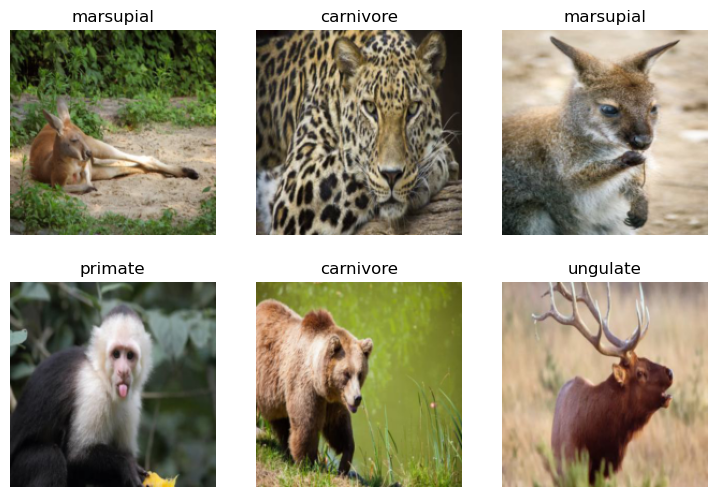

In [14]:
# create training and validation dataset
# note - change mammal type names to singular
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

data.show_batch(max_n=6)

In [15]:
# train model using a pretrained model - resnet
trained_model = vision_learner(data, resnet18, metrics=error_rate)
trained_model.fine_tune(3)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

## Step 3: Test the Model

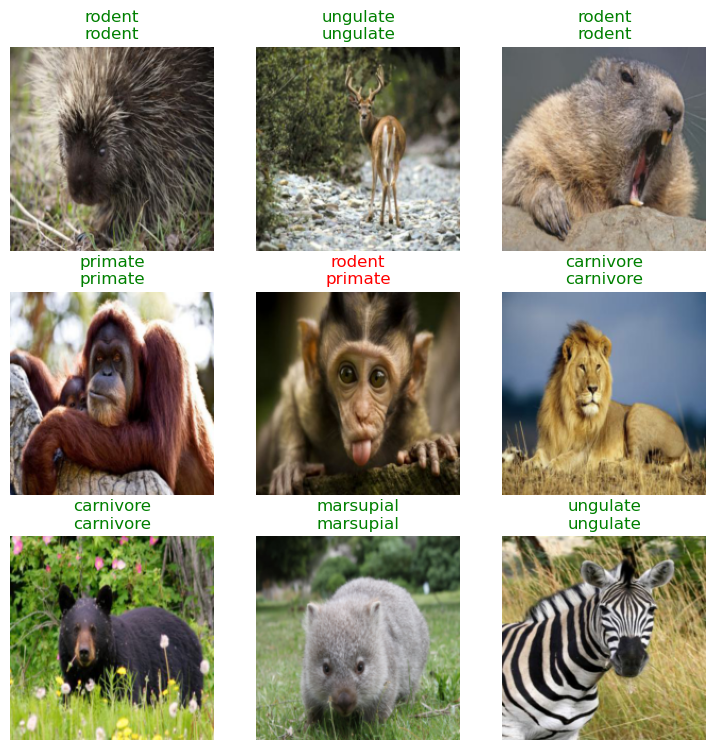

In [16]:
# show some results on validation set (actual label and prediction)
trained_model.show_results()

chimpanzee photo


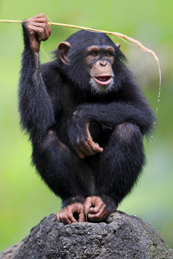

This is a: primate mammal type

bear photo


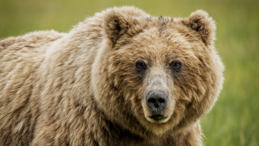

This is a: carnivore mammal type

zebra photo


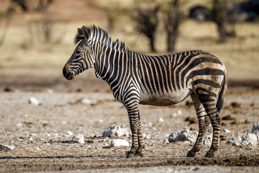

This is a: ungulate mammal type

kangaroo photo


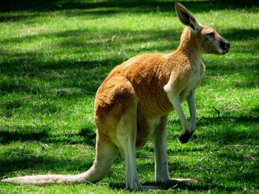

This is a: marsupial mammal type

mouse photo


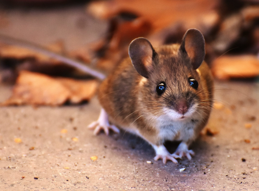

This is a: rodent mammal type

tiger photo


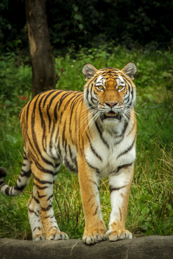

This is a: carnivore mammal type

baboon photo


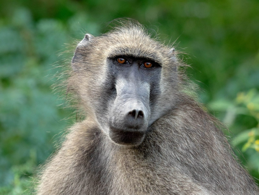

This is a: primate mammal type

moose photo


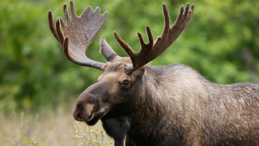

This is a: ungulate mammal type

beaver photo


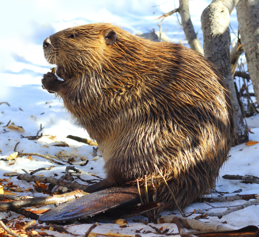

This is a: rodent mammal type



In [32]:
# make predictions on random animals
mammals = 'chimpanzee', 'bear', 'zebra', 'kangaroo', 'mouse', 'tiger', 'baboon', 'moose', 'beaver'
for i in mammals:
    download_url(search_images(f'{i} photo', max_images=1, test=True)[0], f'{i}.jpg', show_progress=False)
    img = Image.open(f'{i}.jpg').to_thumb(259, 259)
    display(img)
    mammal_type,_,probs = trained_model.predict(img)
    print(f"This is a: {mammal_type} mammal type\n")
    

In [ ]:
import pickle

# save the trained model
with open("mammal_classifier.pkl", "wb") as f:
    pickle.dump(trained_model, f)

print("Model saved as mammal_classifier.pkl")


In [ ]:
# create a pickle file
from IPython.display import FileLink

trained_model.export('model.pkl')
FileLink('model.pkl')